In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

import planckStyle
import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline


In [2]:
#dir_name = '/home/isidro/SuperMC/chains/owaChains1'
#dir_name = '/home/isidro/SuperMC_fork_20nov/april/chains'
dir_name = '/home/isidro/SuperMC_/chains'

#roots = ['owaCDM_py_SN+BBAO+RiessH0_mh_50000_1', 'owaCDM_SN+BBAO+RiessH0_snest_0.6', 'owaCDM_SN+BBAO+RiessH0_mnest_0.6',
        #'owaCDM_SN+BBAO+RiessH0_sbambi_0.6', 'owaCDM_SN+BBAO+RiessH0_bambi_0.6']

roots = ['owaCDM_py_SN+Planck_mnest_0.5', 'owaCDM_py_BBAO+Planck_mnest_0.5', 
        'owaCDM_py_HD+Planck_mnest_0.5',
        'owaCDM_py_SN+HD+BBAO+Planck_mnest_0.5']


In [5]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 9,
                          ratio = 0.9, scaling=2,
                          analysis_settings={'smooth_scale_2D': 0.6,
                                             'smooth_scale_1D': 0.6, 
                                             'ignore_rows': 0.2})

<Figure size 648x583.2 with 0 Axes>

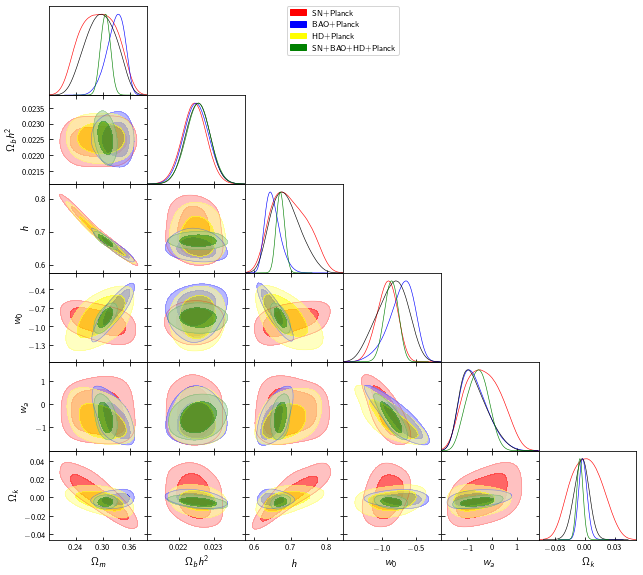

In [8]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 12
g.settings.axes_fontsize = 12
#g.settings.scatter_size = 9
#g.settings.lw_contour = 3

#g.settings.colormap_scatter='spring'

#g.triangle_plot(roots, ['Om', 'Obh2', 'h','w','wa','Ok'], 
#                
#                filled = False, nx=1, alphas=[0.7], 
#                colors=['red','blue','black','green','yellow'],
                #legend_labels=['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI'], 
                #normalized=False, shaded=False)

g.triangle_plot(roots, ['Om', 'Obh2', 'h', 'w', 'wa', 'Ok'], 
                diag1d_kwargs={'colors':['red','blue','black','green']},
                colors=['red','blue','yellow','green'],
                alphas = [0.6, 0.7 , 0.6, 0.5],
                legend_labels=['SN+Planck', 'BAO+Planck', 'HD+Planck', 'SN+BAO+HD+Planck'], 
                filled = True, 
                normalized= True, shaded=False)
        
plt.savefig('samplersTriangleowaCDM.png', dpi=300)

# Probando análisis con Getdist

Generate a MCSample object

In [13]:
SNsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[0], settings={'ignore_rows':0.01})
BAOsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[1], settings={'ignore_rows':0.01})
HDsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[2], settings={'ignore_rows':0.01})
ALLsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[3], settings={'ignore_rows':0.01})
#BAMBIsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[4], )

/home/isidro/SuperMC_/chains/owaCDM_py_SN+Planck_mnest_0.5.txt
Removed 0.01 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_BBAO+Planck_mnest_0.5.txt
Removed 0.01 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_HD+Planck_mnest_0.5.txt
Removed 0.01 as burn in
/home/isidro/SuperMC_/chains/owaCDM_py_SN+HD+BBAO+Planck_mnest_0.5.txt
Removed 0.01 as burn in


In [14]:
freeParameters = ['Om', 'Obh2', 'h','w','wa','Ok']
samplersNames = ['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI']

meansSN = SNsamplefile.getMeans()
meansBAO = BAOsamplefile.getMeans()
meansHD = HDsamplefile.getMeans()
meansALL = ALLsamplefile.getMeans()
#meansBAMBI = BAMBIsamplefile.getMeans()

stdSN = SNsamplefile.std(freeParameters)
stdBAO = BAOsamplefile.std(freeParameters)
stdHD = HDsamplefile.std(freeParameters)
stdALL = ALLsamplefile.std(freeParameters)
#stdBAMBI = BAMBIsamplefile.std(freeParameters)


print("SN+Planck:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansSN[i], 4)) + " \pm " + str(round(stdSN[i], 4)) + "$}")

print("BAO+Planck:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansBAO[i], 4)) + " \pm " + str(round(stdBAO[i], 4)) + "$}")

print("HD + Planck:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansHD[i], 4)) + " \pm " + str(round(stdHD[i], 4)) + "$}")

print("ALL:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansALL[i], 4)) + " \pm " + str(round(stdALL[i], 4)) + "$}")




##MHsamplefile.std('wa')


SN+Planck:
& \scriptsize{$0.2905 \pm 0.0386$}
& \scriptsize{$0.0224 \pm 0.0003$}
& \scriptsize{$0.6971 \pm 0.0478$}
& \scriptsize{$-0.926 \pm 0.1483$}
& \scriptsize{$-0.3497 \pm 0.6825$}
& \scriptsize{$0.0016 \pm 0.0155$}
BAO+Planck:
& \scriptsize{$0.3282 \pm 0.0198$}
& \scriptsize{$0.0225 \pm 0.0004$}
& \scriptsize{$0.6511 \pm 0.0208$}
& \scriptsize{$-0.7124 \pm 0.1923$}
& \scriptsize{$-0.7074 \pm 0.5356$}
& \scriptsize{$-0.0019 \pm 0.0042$}
HD + Planck:
& \scriptsize{$0.2958 \pm 0.0328$}
& \scriptsize{$0.0225 \pm 0.0003$}
& \scriptsize{$0.6865 \pm 0.0395$}
& \scriptsize{$-0.8491 \pm 0.2249$}
& \scriptsize{$-0.7157 \pm 0.5383$}
& \scriptsize{$-0.0035 \pm 0.0074$}
ALL:
& \scriptsize{$0.3056 \pm 0.0108$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.6721 \pm 0.0113$}
& \scriptsize{$-0.8624 \pm 0.1019$}
& \scriptsize{$-0.5776 \pm 0.4328$}
& \scriptsize{$-0.0051 \pm 0.0032$}


In [151]:
MHsamplefile.std('wa')

0.6037760778129502